<a href="https://colab.research.google.com/github/naturefadao/docs-zh-cn/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本次实验以AAAI 2014会议论文数据为基础，要求实现或调用无监督聚类算法，了解聚类方法。

### 任务介绍
每年国际上召开的大大小小学术会议不计其数，发表了非常多的论文。在计算机领域的一些大型学术会议上，一次就可以发表涉及各个方向的几百篇论文。按论文的主题、内容进行聚类，有助于人们高效地查找和获得所需要的论文。本案例数据来源于AAAI 2014上发表的约400篇文章，由[UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!)公开提供，提供包括标题、作者、关键词、摘要在内的信息，希望大家能根据这些信息，合理地构造特征向量来表示这些论文，并设计实现或调用聚类算法对论文进行聚类。最后也可以对聚类结果进行观察，看每一类都是什么样的论文，是否有一些主题。

基本要求：
1. 将文本转化为向量，实现或调用无监督聚类算法，对论文聚类，例如10类（可使用已有工具包例如sklearn）；
2. 观察每一类中的论文，调整算法使结果较为合理；
3. 无监督聚类没有标签，效果较难评价，因此没有硬性指标，跑通即可，主要让大家了解和感受聚类算法，比较简单。

扩展要求：
1. 对文本向量进行降维，并将聚类结果可视化成散点图。

注：group和topic也不能完全算是标签，因为
1. 有些文章作者投稿时可能会选择某个group/topic但实际和另外group/topic也相关甚至更相关；
2. 一篇文章可能有多个group和topic，作为标签会出现有的文章同属多个类别，这里暂不考虑这样的聚类；
3. group和topic的取值很多，但聚类常常希望指定聚合成出例如5/10/20类；
4. 感兴趣但同学可以思考利用group和topic信息来量化评价无监督聚类结果，不作要求。

提示：
1. 高维向量的降维旨在去除一些高相关性的特征维度，保留最有用的信息，用更低维的向量表示高维数据，常用的方法有PCA和t-SNE等；
2. 降维与聚类是两件不同的事情，聚类实际上在降维前的高维向量和降维后的低维向量上都可以进行，结果也可能截然不同；
3. 高维向量做聚类，降维可视化后若有同一类的点不在一起，是正常的。在高维空间中它们可能是在一起的，降维后损失了一些信息。

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading keywords: Package 'keywords' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to /root/nltk_data...


数据行数: 398
列名: ['title', 'authors', 'groups', 'keywords', 'topics', 'abstract']


[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


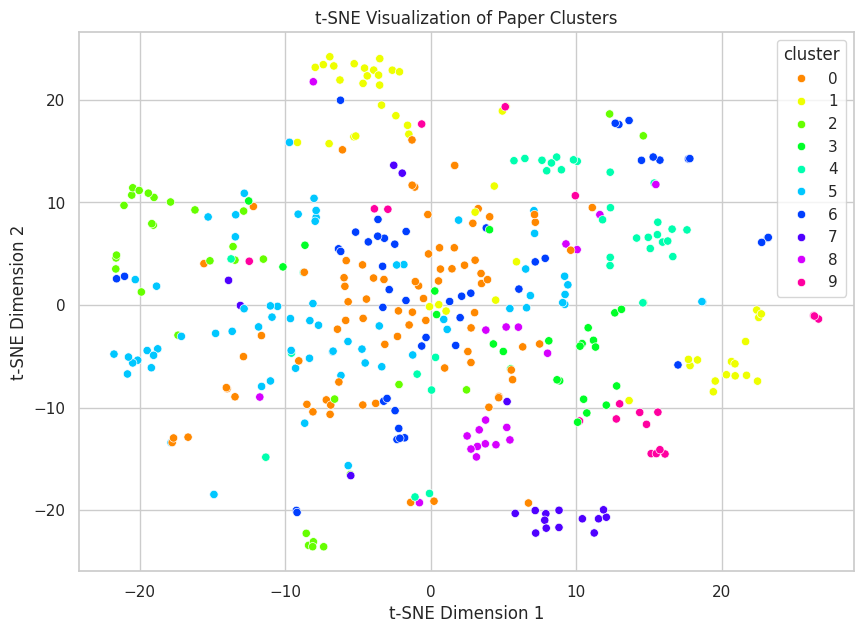


===== 类别 0 =====
论文标题示例（最多10条）：
 - Fraudulent Support Telephone Number Identification Based on Co-occurrence Information on the Web
 - R2: An Efficient MCMC Sampler for Probabilistic Programs
 - Solving Uncertain MDPs by Reusing State Information and Plans
 - A Latent Variable Model for Discovering Bird Species Commonly Misidentified by Citizen Scientists
 - Exact Subspace Clustering in Linear Time
 - Robust Bayesian Inverse Reinforcement Learning with Sparse Behavior Noise
 - Dropout Training for Support Vector Machines
 - Recovering from Selection Bias in Causal and Statistical Inference
 - Active Learning with Model Selection via Nested Cross-Validation
 - Adaptive Multi-Compositionality for Recursive Neural Models with Applications to Sentiment Analysis
高频关键词: ['learning', 'algorithm', 'model', 'method', 'problem', 'data', 'show', 'paper', 'approach', 'behavior']

===== 类别 1 =====
论文标题示例（最多10条）：
 - The Importance of Cognition and Affect for Artificially Intelligent Decision Makers

In [7]:
!pip uninstall -y nltk
!pip install nltk==3.8.1# -----------------------------
# 1. 导入库
# -----------------------------

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 设置显示
sns.set(style='whitegrid')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download punkt_tab

# -----------------------------
# 2. 读取数据
# -----------------------------
data = pd.read_csv('/home/[UCI] AAAI-14 Accepted Papers - Papers.csv') #colab数据路径
print("数据行数:", len(data))
print("列名:", data.columns.tolist())
# Q :运行报错：  Resource punkt_tab not found.解决
nltk.download('punkt', force=True)  # 强制重新下载
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download punkt_tab again for safety
# 使用 'abstract' 这一个列来聚类，如果没有请修改为实际列名
text_column = 'abstract'
data = data.dropna(subset=[text_column])  # 去除缺失摘要的行

# -----------------------------
# 3. 文本预处理函数
# -----------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())  # 转小写并分词
    tokens = [w for w in tokens if w.isalpha()]  # 去除非字母
    tokens = [w for w in tokens if w not in stop_words]  # 去停用词
    tokens = [lemmatizer.lemmatize(w) for w in tokens]  # 词形还原
    return ' '.join(tokens)

# 应用清洗
data['cleaned_text'] = data[text_column].apply(clean_text)

# -----------------------------
# 4. TF-IDF 向量化
# -----------------------------
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['cleaned_text'])

# -----------------------------
# 5. KMeans 聚类
# -----------------------------
n_clusters = 10  # 你可以自定义类数
kmeans = KMeans(n_clusters=n_clusters, random_state=2020)
data['cluster'] = kmeans.fit_predict(X)

# -----------------------------
# 6. PCA 或 t-SNE 降维可视化
# -----------------------------
# 使用 PCA 先降到 50 维，再用 t-SNE 降到 2 维
pca = PCA(n_components=50, random_state=2020)
X_pca = pca.fit_transform(X.toarray())

tsne = TSNE(n_components=2, random_state=2020, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

# 可视化
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", n_clusters)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['cluster'], palette=palette, legend='full')
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

# -----------------------------
# 7. 查看每个聚类的高频关键词
# -----------------------------
for i in range(n_clusters):
    print(f"\n===== Cluster {i} =====")
    texts = data[data['cluster'] == i]['cleaned_text']
    all_words = ' '.join(texts).split()
    common_words = Counter(all_words).most_common(10)
    print("Top keywords:", [w for w, _ in common_words])